# Cox-Munk Distribution

The Cox-Munk distribution is a bivariate (an)isotropic Gaussian that describes the distribition of wave surface-facet slopes with respect to wind speed.

In [1]:
import numpy as np

In [2]:
# "Peakedness" coefficients
c_40 = 0.40
c_22 = 0.12
c_04 = 0.23


In [3]:
# Skewness coefficients
c_21 = lambda u: 0.01 - 0.0086 * u
c_03 = lambda u: 0.02 - 0.0023 * u

In [4]:
# RMS of Z_x and Z_y
s_c_sqr = lambda u: 0.003 + 0.00192 * u
s_u_sqr = lambda u: 0.00316 * u

In [5]:
def z_x(t_o, t_i, phi):
    return (-np.sin(t_o) * np.sin(phi)) / (np.cos(t_i) * np.cos(t_o))

def z_y(t_o, t_i, phi):
    return (np.sin(t_i) + np.sin(t_o) * np.cos(phi)) / (np.cos(t_i) * np.cos(t_o))

In [6]:
def z_x_prime(t_o, t_i, chi):
    return z_x(t_o, t_i, chi) * np.cos(chi) + z_y(t_o, t_i, chi) * np.sin(chi)

def z_y_prime(t_o, t_i, chi):
    return -z_x(t_o, t_i, chi) * np.sin(chi) + z_y(t_o, t_i, chi) * np.cos(chi)

In [7]:
def ksi(t_o, t_i, chi, u):
    return z_x_prime(t_o, t_i, chi) / np.sqrt(s_c_sqr(u))

def eta(t_o, t_i, chi, u):
    return z_y_prime(t_o, t_i, chi) / np.sqrt(s_u_sqr(u))

In [8]:
# Actual distribution PDF
def spec_prob(t_o, t_i, p_i, p_u, u):
    chi = p_i - p_u
    s_c = np.sqrt(s_c_sqr(u))
    s_u = np.sqrt(s_u_sqr(u))
    ksi_val = ksi(t_o, t_i, chi, u)
    eta_val = eta(t_o, t_i, chi, u)
    ksi_sqr = ksi_val ** 2
    eta_sqr = eta_val ** 2
    norm_factor = 1 / (2 * np.pi * s_c * s_u)
    exp_factor = np.exp(-0.5 * (ksi_sqr + eta_sqr))
    a = (c_21(u) / 2.0) * (ksi_sqr - 1.0) * eta_val
    b = (c_03(u) / 6.0) * (eta_sqr * eta_val - 3.0 * eta_val)
    c = (c_40 / 24.0) * (ksi_sqr ** 2 - 6.0 * ksi_sqr + 3.0)
    d = (c_22 / 4.0) * (ksi_sqr - 1.0) * (eta_sqr - 1.0)
    e = (c_04 / 24.0) * (eta_sqr ** 2 - 6.0 * eta_sqr + 3.0)
    return norm_factor * exp_factor * (1.0 - a - b + c + d + e)

In [9]:
# Initialize wind speed and direction
wind_speed = 10
wind_azimuth = 0.0

# Initialize the solar angles
res = 50
zeniths = np.linspace(0, np.pi / 2, res)
azimuths = np.linspace(0, 2 * np.pi, res)

In [10]:
# Define the number of angles
N = 91
zenith_vs = np.linspace(0, np.pi / 2, N)

# For each zenith, compute the probability
zenith_dict = {}
idx = 0
max_idx = len(zenith_vs)
max_prob = 0
min_prob = 1
for zenith_v in zenith_vs:
    pdf = np.zeros((res, res))
    max_current_prob = 0
    for i, zenith_s in enumerate(zeniths):
        for j, azimuth_s in enumerate(azimuths):
            prob = spec_prob(zenith_v, zenith_s, azimuth_s, wind_azimuth, wind_speed)
            pdf[i, j] = prob
            if prob > max_prob:
                max_prob = prob
            if prob < min_prob:
                min_prob = prob
            if prob > max_current_prob:
                max_current_prob = prob
    
    zenith_dict[zenith_v] = pdf
    idx = idx + 1
    print(f"Progress: {idx}/{max_idx} (Max Prob {idx}: {max_current_prob})")

# Normalize the probabilities between 0 and 1

for zenith_v in zenith_dict:
    zenith_probs = zenith_dict[zenith_v]
    zenith_probs = (zenith_probs - min_prob) / (max_prob - min_prob)
    zenith_dict[zenith_v] = zenith_probs

# Print the minimum and maximum probabilities
print(f"Min prob: {min_prob}")
print(f"Max prob: {max_prob}")



Progress: 1/91 (Max Prob 1: 6.662446520240067)
Progress: 2/91 (Max Prob 2: 6.655250388585558)
Progress: 3/91 (Max Prob 3: 6.656731949601241)
Progress: 4/91 (Max Prob 4: 6.658282993863742)
Progress: 5/91 (Max Prob 5: 6.647342175677359)
Progress: 6/91 (Max Prob 6: 6.6576362743466975)
Progress: 7/91 (Max Prob 7: 6.634186000629378)
Progress: 8/91 (Max Prob 8: 6.6532324241261)
Progress: 9/91 (Max Prob 9: 6.618053348547295)
Progress: 10/91 (Max Prob 10: 6.64493137522866)
Progress: 11/91 (Max Prob 11: 6.6180710888326715)
Progress: 12/91 (Max Prob 12: 6.632526554222262)
Progress: 13/91 (Max Prob 13: 6.613980617775005)
Progress: 14/91 (Max Prob 14: 6.61573894075469)
Progress: 15/91 (Max Prob 15: 6.605505058790526)
Progress: 16/91 (Max Prob 16: 6.5942092306811935)
Progress: 17/91 (Max Prob 17: 6.592281471380786)
Progress: 18/91 (Max Prob 18: 6.5674878534681405)
Progress: 19/91 (Max Prob 19: 6.573848888170369)
Progress: 20/91 (Max Prob 20: 6.535022538674592)
Progress: 21/91 (Max Prob 21: 6.549633

In [11]:
# Clear all files in cox_munk
import os

for file in os.listdir("cox_munk"):
    os.remove(os.path.join("cox_munk", file))

In [12]:
# Plot the PDF as a heatmap
import matplotlib.pyplot as plt

images = []
idx = 0

for zenith, pdf in zenith_dict.items():
    # Make plot as a heatmap
    plt.imshow(pdf, cmap='turbo', interpolation='quadric', extent=[0, 2 * np.pi, 0, np.pi / 2])

    # Name the axes
    plt.xlabel("Solar Azimuth (rad)")
    plt.ylabel("Solar Zenith (rad)")

    # Add the title
    degrees = np.degrees(zenith)

    # Round to 2 decimal places
    degrees = round(degrees, 2)

    plt.title("Viewing Zenith = " + str(degrees))

    # Colorbar
    plt.colorbar()

    # Save the image
    filename = "cox_munk/" + str(degrees) + ".png"
    plt.savefig(filename)

    idx = idx + 1
    print(f"Progress: {idx}/{max_idx}")
    plt.close()

# Stop viewing the plot
plt.close()

Progress: 1/91
Progress: 2/91
Progress: 3/91
Progress: 4/91
Progress: 5/91
Progress: 6/91
Progress: 7/91
Progress: 8/91
Progress: 9/91
Progress: 10/91
Progress: 11/91
Progress: 12/91
Progress: 13/91
Progress: 14/91
Progress: 15/91
Progress: 16/91
Progress: 17/91
Progress: 18/91
Progress: 19/91
Progress: 20/91
Progress: 21/91
Progress: 22/91
Progress: 23/91
Progress: 24/91
Progress: 25/91
Progress: 26/91
Progress: 27/91
Progress: 28/91
Progress: 29/91
Progress: 30/91
Progress: 31/91
Progress: 32/91
Progress: 33/91
Progress: 34/91
Progress: 35/91
Progress: 36/91
Progress: 37/91
Progress: 38/91
Progress: 39/91
Progress: 40/91
Progress: 41/91
Progress: 42/91
Progress: 43/91
Progress: 44/91
Progress: 45/91
Progress: 46/91
Progress: 47/91
Progress: 48/91
Progress: 49/91
Progress: 50/91
Progress: 51/91
Progress: 52/91
Progress: 53/91
Progress: 54/91
Progress: 55/91
Progress: 56/91
Progress: 57/91
Progress: 58/91
Progress: 59/91
Progress: 60/91
Progress: 61/91
Progress: 62/91
Progress: 63/91
P

In [13]:
# Create gif animation
import imageio

filesnames = ["cox_munk/" + str(round(np.degrees(zenith), 2)) + ".png" for zenith in zenith_vs]

images = [imageio.imread(filename) for filename in filesnames]
imageio.mimsave('cox_munk/animation.gif', images, duration=5)

/tmp/ipykernel_25009/2504805664.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(filename) for filename in filesnames]


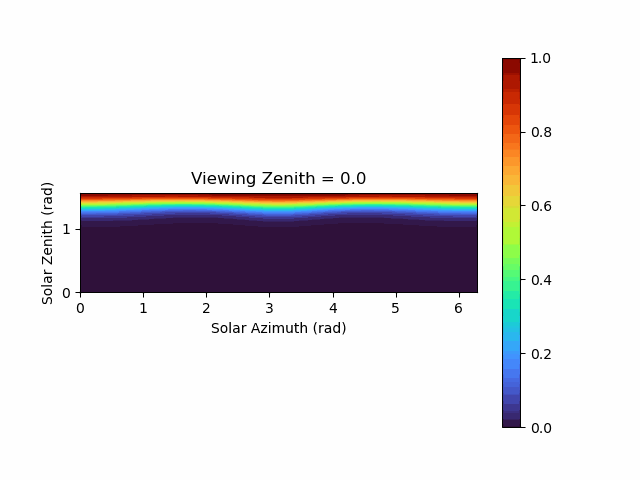

In [14]:
# display the animation
from IPython.display import Image

Image("cox_munk/animation.gif")